In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
%matplotlib inline

In [2]:
# In simulation_res.pkl, we have
# a continuous prediction and label positions for multiple systems, 
# and their configuration
with open('simulation_res.pkl', 'rb') as f:
    a = pkl.load(f)

In [3]:
len(a)

30

In [10]:
t = 20
# 0, 4, 8
idx = 8

In [11]:
cur_loss, cur_x_pred, cur_x_end, cur_cfg = a[idx]
cur_x_pred = cur_x_pred.reshape(t, -1, 3)
cur_x_end = cur_x_end.reshape(t, -1, 3)
print(cur_x_end.shape)

(20, 10, 3)


{'Isolated': array([[9],
       [5],
       [1]]), 'Stick': array([[7, 2],
       [4, 8]]), 'Hinge': array([[0, 6, 3]])}


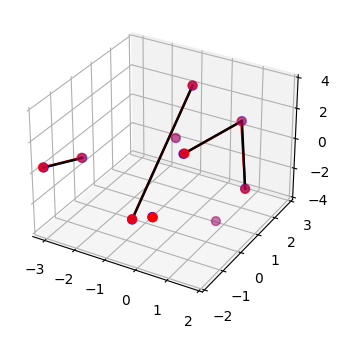

In [12]:
from matplotlib import animation

lw = 1.7
print(cur_cfg)

fig = plt.figure(figsize=(4, 4), dpi=100)
ax = fig.gca(projection='3d')

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

for line in ax.xaxis.get_ticklines():
    line.set_visible(False)
for line in ax.yaxis.get_ticklines():
    line.set_visible(False)
for line in ax.zaxis.get_ticklines():
    line.set_visible(False)
    
def animate(T):
    plt.cla()
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.set_xlim(-3.3, 2)
    ax.set_ylim(-2, 3)
    ax.set_zlim(-4, 4)
    ax.scatter(cur_x_end[T][...,0],cur_x_end[T][...,1],cur_x_end[T][...,2],color="r",s=40)
    ax.scatter(cur_x_pred[T][...,0],cur_x_pred[T][...,1],cur_x_pred[T][...,2],color="b",s=40)


    for s in cur_cfg['Stick']:
        cur_x = cur_x_end[T][s]
        ax.plot(cur_x[..., 0], cur_x[..., 1], cur_x[..., 2], color='red', linewidth=lw)

    for h in cur_cfg['Hinge']:
        cur_x = np.array([cur_x_end[T][h[0]], cur_x_end[T][h[1]]])
        ax.plot(cur_x[..., 0], cur_x[..., 1], cur_x[..., 2], color='red', ls='-', linewidth=lw)
        cur_x = np.array([cur_x_end[T][h[0]], cur_x_end[T][h[2]]])
        ax.plot(cur_x[..., 0], cur_x[..., 1], cur_x[..., 2], color='red', ls='-', linewidth=lw)

    for s in cur_cfg['Stick']:
        cur_x = cur_x_pred[T][s]
        ax.plot(cur_x[..., 0], cur_x[..., 1], cur_x[..., 2], color='black', linewidth=lw)

    for h in cur_cfg['Hinge']:
        cur_x = np.array([cur_x_pred[T][h[0]], cur_x_pred[T][h[1]]])
        ax.plot(cur_x[..., 0], cur_x[..., 1], cur_x[..., 2], color='black', ls='-', linewidth=lw)
        cur_x = np.array([cur_x_pred[T][h[0]], cur_x_pred[T][h[2]]])
        ax.plot(cur_x[..., 0], cur_x[..., 1], cur_x[..., 2], color='black', ls='-', linewidth=lw)
    return fig,

anim = animation.FuncAnimation(fig, animate,
                               frames=20, interval=30, blit=True)


# # Animate
# anim = animation.FuncAnimation(fig, animate,
#                                frames=20, interval=30, blit=True)
# # Save
# anim.save('basic_animation.mp4', fps=10, extra_args=['-vcodec', 'libx264'])

f = "animation_" + str(idx) + ".gif" 
writergif = animation.PillowWriter(fps=10) 
anim.save(f, writer=writergif)
